In [1]:
# ! pip install sklearn
# general imports 
import allensdk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# set data path
import sys
import platform
import os
from os.path import join as pjoin
from pathlib import Path


import sys
sys.path.insert(0, '/code/src')
import importlib
import plot_utils
# reload it after edits
importlib.reload(plot_utils)
# from data_utils import process_nwb_metadata, get_stim_window, get_spike_counts_all
from plot_utils import create_raster, plot_area_psth_and_raster
# from classifier import get_classifier, run_classifier

# Set paths + import data tables from AllenSDK

In [2]:
platstring = platform.platform()
system = platform.system()
if system == "Darwin":
    # macOS
    data_dir = "/Volumes/Brain2025/"
elif system == "Windows":
    # Windows (replace with the drive letter of USB drive)
    data_dir = "E:/"
elif "amzn" in platstring:
    # then on CodeOcean
    data_dir = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_dir = "/media/$USERNAME/Brain2025/"
data_root = Path(data_dir)
print('data directory set to', data_dir)

data directory set to /data/


In [3]:
# Visual Behavior Neuropixels 
from allensdk.brain_observatory.behavior.behavior_project_cache.\
    behavior_neuropixels_project_cache \
    import VisualBehaviorNeuropixelsProjectCache

cache_dir = '/root/capsule/data/'

cache = VisualBehaviorNeuropixelsProjectCache.from_local_cache(
            cache_dir=cache_dir, use_static_cache=True)

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
behaviour_session_table = cache.get_behavior_session_table() 
ecephys_session_table = cache.get_ecephys_session_table() 
probe_table = cache.get_probe_table() 
channel_table = cache.get_channel_table() 
unit_table = cache.get_unit_table() 

# Initial data exploration

## Explore ephys data for WT mice (CA1)

In [5]:
no_genotype_ecephys_session_table = ecephys_session_table[ecephys_session_table.genotype == "wt/wt"]
no_genotype_ecephys_session_table.head()

,behavior_session_id,date_of_acquisition,equipment_name,session_type,mouse_id,genotype,sex,project_code,age_in_days,unit_count,...,channel_count,structure_acronyms,image_set,prior_exposures_to_image_set,session_number,experience_level,prior_exposures_to_omissions,file_id,abnormal_histology,abnormal_activity
ecephys_session_id,,,,,,,,,,,,,,,,,,,,,
1044385384,1044408432,2020-08-19 14:47:08.574000+00:00,NP.1,EPHYS_1_images_G_5uL_reward,524761,wt/wt,F,NeuropixelVisualBehavior,151,2179,...,1920,"['CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg', 'LGv...",G,30,1,Familiar,0,870,NaN,NaN
1044594870,1044624428,2020-08-20 15:03:56.422000+00:00,NP.1,EPHYS_1_images_H_5uL_reward,524761,wt/wt,F,NeuropixelVisualBehavior,152,2103,...,1920,"['CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg', 'HPF...",H,0,2,Novel,1,872,NaN,NaN
1051155866,1052162536,2020-09-17 15:05:39.665000+00:00,NP.1,EPHYS_1_images_H_3uL_reward,524760,wt/wt,F,NeuropixelVisualBehavior,180,1922,...,2304,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0,2,Novel,1,883,NaN,NaN
1055221968,1055253879,2020-10-07 14:01:41.373000+00:00,NP.1,EPHYS_1_images_G_3uL_reward,533537,wt/wt,M,NeuropixelVisualBehavior,143,2585,...,2304,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",G,34,1,Familiar,0,892,NaN,NaN
1055240613,1055260435,2020-10-07 14:53:34.486000+00:00,NP.0,EPHYS_1_images_G_3uL_reward,533539,wt/wt,F,NeuropixelVisualBehavior,143,2290,...,2304,"['CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg', 'HPF...",G,15,1,Familiar,0,893,NaN,NaN


In [6]:
CA1_unit_table = unit_table[unit_table.structure_acronym == "CA1"]
CA1_unit_table.head()

,ecephys_channel_id,ecephys_probe_id,ecephys_session_id,amplitude_cutoff,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,cumulative_drift,d_prime,structure_acronym,...,valid_data,amplitude,waveform_duration,waveform_halfwidth,PT_ratio,recovery_slope,repolarization_slope,spread,velocity_above,velocity_below
unit_id,,,,,,,,,,,,,,,,,,,,,
1157006414,1157002029,1046469925,1046166369,0.500000,7980.0,1538.0,7242.0,289.46,6.601465,CA1,...,True,116.873347,0.315913,0.096147,0.628878,-0.021616,0.337954,20.0,NaN,-0.686767
1157006718,1157002041,1046469925,1046166369,0.059218,7921.0,1246.0,7348.0,500.96,1.783789,CA1,...,True,82.136437,0.315913,0.082412,0.196813,-0.038163,0.314929,30.0,0.000000,0.000000
1157006715,1157002041,1046469925,1046166369,0.002710,7921.0,1246.0,7348.0,56.23,4.360678,CA1,...,True,150.551993,0.288442,0.096147,0.178548,-0.055036,0.565327,30.0,0.000000,0.000000
1157006424,1157002041,1046469925,1046166369,0.006687,7921.0,1246.0,7348.0,126.66,2.877968,CA1,...,True,87.738202,0.343384,0.096147,0.180291,-0.031248,0.342194,20.0,0.000000,NaN
1157006429,1157002042,1046469925,1046166369,0.320235,7914.0,1217.0,7358.0,623.41,4.595620,CA1,...,True,88.696920,0.467002,0.164824,3.786460,-0.024864,0.292687,30.0,1.373534,-0.686767


In [7]:
# Let's merge the ecephys_sessions table and units table
CA1_unit_ecephys_table = CA1_unit_table.merge(no_genotype_ecephys_session_table, on='ecephys_session_id')

# Now we have ecephys_sessions and units together
CA1_unit_ecephys_table.columns

# How many units are CA1? 
print(f"Unique channels in CA1: {len(CA1_unit_ecephys_table.ecephys_channel_id.unique())}") 
print(f"Unique probes in CA1: {len(CA1_unit_ecephys_table.ecephys_probe_id.unique())}") 
print(f"Units in CA1: {len(CA1_unit_ecephys_table)}") 
print(f"stimulus sets: {CA1_unit_ecephys_table.session_type.unique()}\n")

print(f"Number of units per session type (in CA1):")
print(CA1_unit_ecephys_table.value_counts("session_type"))

number_of_channels_and_probes_per_session_type = CA1_unit_ecephys_table.reset_index().rename(columns={'index':'unit_id'}).pivot_table(index=['session_type'], values=['ecephys_channel_id','ecephys_probe_id','unit_id'], aggfunc=lambda x: len(x.unique()))
number_of_channels_and_probes_per_session_type.head()

# CA1_unit_ecephys_table.head()

Unique channels in CA1: 4344
Unique probes in CA1: 158
Units in CA1: 11184
stimulus sets: ['EPHYS_1_images_G_3uL_reward' 'EPHYS_1_images_H_3uL_reward'
 'EPHYS_1_images_H_5uL_reward' 'EPHYS_1_images_G_5uL_reward']

Number of units per session type (in CA1):
session_type
EPHYS_1_images_H_3uL_reward    5431
EPHYS_1_images_G_3uL_reward    4974
EPHYS_1_images_G_5uL_reward     406
EPHYS_1_images_H_5uL_reward     373
dtype: int64


,ecephys_channel_id,ecephys_probe_id,unit_id
session_type,,,
EPHYS_1_images_G_3uL_reward,1962,70,4974
EPHYS_1_images_G_5uL_reward,145,4,406
EPHYS_1_images_H_3uL_reward,2099,80,5431
EPHYS_1_images_H_5uL_reward,138,4,373


## Explore behavior data for WT mice

In [8]:
# Let's merge the ecephys_sessions table and units table
CA1_unit_ecephys_table = CA1_unit_table.merge(no_genotype_ecephys_session_table, on='ecephys_session_id')

# Now we have ecephys_sessions and units together
# CA1_unit_ecephys_table.columns
# How many units are CA1? 
print(f"Units in CA1: {len(CA1_unit_ecephys_table)}") 
print(f"stimulus sets: {CA1_unit_ecephys_table.session_type.unique()}")
CA1_unit_ecephys_table.head()

Units in CA1: 11184
stimulus sets: ['EPHYS_1_images_G_3uL_reward' 'EPHYS_1_images_H_3uL_reward'
 'EPHYS_1_images_H_5uL_reward' 'EPHYS_1_images_G_5uL_reward']


,ecephys_channel_id,ecephys_probe_id,ecephys_session_id,amplitude_cutoff,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,cumulative_drift,d_prime,structure_acronym,...,channel_count,structure_acronyms,image_set,prior_exposures_to_image_set,session_number,experience_level,prior_exposures_to_omissions,file_id,abnormal_histology,abnormal_activity
0,1082870721,1081297298,1081079981,9.098659e-07,7796.0,1352.0,7218.0,87.11,11.283012,CA1,...,2304,"['APN', 'CA1', 'DG-mo', 'DG-po', 'DG-sg', 'HPF...",G,23,1,Familiar,0,934,NaN,NaN
1,1082870721,1081297298,1081079981,4.590550e-01,7796.0,1352.0,7218.0,115.00,3.711991,CA1,...,2304,"['APN', 'CA1', 'DG-mo', 'DG-po', 'DG-sg', 'HPF...",G,23,1,Familiar,0,934,NaN,NaN
2,1082870671,1081297298,1081079981,8.260163e-02,7906.0,1587.0,7131.0,200.66,3.467683,CA1,...,2304,"['APN', 'CA1', 'DG-mo', 'DG-po', 'DG-sg', 'HPF...",G,23,1,Familiar,0,934,NaN,NaN
3,1082870671,1081297298,1081079981,5.193935e-02,7906.0,1587.0,7131.0,253.09,3.250599,CA1,...,2304,"['APN', 'CA1', 'DG-mo', 'DG-po', 'DG-sg', 'HPF...",G,23,1,Familiar,0,934,NaN,NaN
4,1082870671,1081297298,1081079981,9.801373e-03,7906.0,1587.0,7131.0,111.52,3.265091,CA1,...,2304,"['APN', 'CA1', 'DG-mo', 'DG-po', 'DG-sg', 'HPF...",G,23,1,Familiar,0,934,NaN,NaN


In [9]:
# Let's merge the ecephys table and behaviour table
behaviour_ecephys_session_table = behaviour_session_table.merge(no_genotype_ecephys_session_table, on='ecephys_session_id')

# Now we have ecephys and behaviour together
print(f"stimulus sets: {behaviour_ecephys_session_table.session_type_x.unique()}")

behaviour_ecephys_session_table.head()

stimulus sets: ['EPHYS_1_images_G_5uL_reward' 'EPHYS_1_images_H_5uL_reward'
 'EPHYS_1_images_H_3uL_reward' 'EPHYS_1_images_G_3uL_reward']


,equipment_name_x,genotype_x,mouse_id_x,sex_x,age_in_days_x,session_number_x,prior_exposures_to_session_type,prior_exposures_to_image_set_x,prior_exposures_to_omissions_x,ecephys_session_id,...,channel_count,structure_acronyms,image_set_y,prior_exposures_to_image_set_y,session_number_y,experience_level,prior_exposures_to_omissions_y,file_id_y,abnormal_histology,abnormal_activity
0,NP.1,wt/wt,524761,F,151,47,0,30,0,1044385384,...,1920,"['CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg', 'LGv...",G,30,1,Familiar,0,870,NaN,NaN
1,NP.1,wt/wt,524761,F,152,48,0,0,1,1044594870,...,1920,"['CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg', 'HPF...",H,0,2,Novel,1,872,NaN,NaN
2,NP.1,wt/wt,524760,F,180,58,0,0,1,1051155866,...,2304,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0,2,Novel,1,883,NaN,NaN
3,NP.1,wt/wt,533537,M,143,41,0,34,0,1055221968,...,2304,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",G,34,1,Familiar,0,892,NaN,NaN
4,NP.1,wt/wt,533537,M,144,42,0,0,1,1055403683,...,2304,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0,2,Novel,1,894,NaN,NaN


In [10]:
sessions_by_imageset_experience_day = no_genotype_ecephys_session_table.pivot_table(index=['session_number', 'experience_level'], 
                                                                        columns=['image_set'], 
                                                                        values='behavior_session_id', aggfunc=len)
display(sessions_by_imageset_experience_day)

,image_set,G,H
session_number,experience_level,,
1,Familiar,8,10
2,Novel,10,10


In [11]:
#Number of mice per genotype/sex
mice_by_genotype_sex = no_genotype_ecephys_session_table.pivot_table(values='mouse_id', index='genotype', 
                                                          columns='sex', aggfunc=lambda x: len(np.unique(x)))
display(mice_by_genotype_sex)

sex,F,M
genotype,,
wt/wt,8,12


# Single session analysis

In [12]:
a_novel_session_id = 1044594870
# a_familiar_session_id = 1044385384
a_novel_session = cache.get_ecephys_session(
            ecephys_session_id=a_novel_session_id)
# a_familiar_session = cache.get_ecephys_session(
#             ecephys_session_id=a_familiar_session_id)
a_novel_session.metadata

/opt/conda/lib/python3.9/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.7.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)
/opt/conda/lib/python3.9/site-packages/allensdk/brain_observatory/behavior/data_objects/metadata/subject_metadata/full_genotype.py:57: UserWarning: Unable to parse cre_line from full_genotype
  warnings.warn('Unable to parse cre_line from full_genotype')


{'equipment_name': 'NP.1',
 'sex': 'F',
 'age_in_days': 152,
 'stimulus_frame_rate': 60.0,
 'session_type': 'EPHYS_1_images_H_5uL_reward',
 'date_of_acquisition': datetime.datetime(2020, 8, 20, 22, 3, 56, tzinfo=tzutc()),
 'reporter_line': None,
 'cre_line': None,
 'behavior_session_uuid': UUID('3338aa28-9865-443b-a69a-83f78f6dba19'),
 'driver_line': [],
 'mouse_id': '524761',
 'project_code': 'Not Available',
 'full_genotype': 'wt/wt',
 'behavior_session_id': 1044624428,
 'ecephys_session_id': 1044594870}

In [13]:
units = a_novel_session.get_units()
channels = a_novel_session.get_channels()

unit_channels = units.merge(channels, left_on='peak_channel_id', right_index=True)

In [14]:
unit_channels.value_counts('structure_acronym')

structure_acronym
DG       389
CA1      373
VISl     178
CA3      152
VISp     130
VISpm    126
VISal    118
MRN      110
VISrl     89
POL       89
POST      59
LP        56
MGv       45
SCig      36
MB        35
PIL       26
MGd       26
root      19
HPF       15
MGm       14
TH        11
PP         6
SNr        1
dtype: int64

In [15]:
#first let's sort our units by depth
unit_channels = unit_channels.sort_values('probe_vertical_position', ascending=False)

#now we'll filter them
good_unit_filter = ((unit_channels['snr']>1)&
                    (unit_channels['isi_violations']<1)&
                    (unit_channels['firing_rate']>0.1))

good_units = unit_channels.loc[good_unit_filter]
spike_times = a_novel_session.spike_times
stimulus_presentations = a_novel_session.stimulus_presentations
change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
stimulus_presentations

,stimulus_block,image_name,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,...,color,stimulus_name,temporal_frequency,orientation,position_x,contrast,spatial_frequency,rewarded,is_sham_change,position_y
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,
0,0,im104_r,0.250213,26.415843,26.666057,60,75,False,True,False,...,NaN,Natural_Images_Lum_Matched_set_ophys_H_2019,NaN,NaN,NaN,NaN,NaN,False,False,NaN
1,0,im104_r,0.250213,27.166484,27.416697,105,120,False,True,False,...,NaN,Natural_Images_Lum_Matched_set_ophys_H_2019,NaN,NaN,NaN,NaN,NaN,False,False,NaN
2,0,im104_r,0.250199,27.917095,28.167294,150,165,False,True,False,...,NaN,Natural_Images_Lum_Matched_set_ophys_H_2019,NaN,NaN,NaN,NaN,NaN,False,False,NaN
3,0,im104_r,0.250216,28.667709,28.917925,195,210,False,True,False,...,NaN,Natural_Images_Lum_Matched_set_ophys_H_2019,NaN,NaN,NaN,NaN,NaN,False,False,NaN
4,0,im104_r,0.250199,29.418357,29.668556,240,255,False,True,False,...,NaN,Natural_Images_Lum_Matched_set_ophys_H_2019,NaN,NaN,NaN,NaN,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13396,5,im024_r,0.250211,8784.826648,8785.076859,523377,523392,False,True,False,...,NaN,Natural_Images_Lum_Matched_set_ophys_H_2019,NaN,NaN,NaN,NaN,NaN,False,False,NaN
13397,5,im024_r,0.250207,8785.577281,8785.827488,523422,523437,False,True,False,...,NaN,Natural_Images_Lum_Matched_set_ophys_H_2019,NaN,NaN,NaN,NaN,NaN,False,False,NaN
13398,5,im024_r,0.250206,8786.327901,8786.578107,523467,523482,False,True,False,...,NaN,Natural_Images_Lum_Matched_set_ophys_H_2019,NaN,NaN,NaN,NaN,NaN,False,False,NaN


### PSTH

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# reload it after edits
importlib.reload(plot_utils)
from data_utils import process_nwb_metadata, get_stim_window, get_spike_counts_all
from plot_utils import plot_area_psth_and_raster, plot_multi_area_psth_and_raster, build_area_packet

In [17]:
areas_to_plot = ['DG', 'CA1', 'CA3', 'VISl','VISp','VISpm', 'VISal', 'VISrl']

In [18]:
area_packets = [build_area_packet(a, good_units, spike_times, sort_key='depth') for a in areas_to_plot]

In [19]:
area_packets[1].keys()

dict_keys(['name', 'spikes', 'raster_idx'])

In [20]:
# area_of_interest = 'CA1'
# area_units = good_units[good_units['structure_acronym'] == area_of_interest]
# spike_times_by_unit = [spike_times[iu] for iu, _ in area_units.iterrows()]
# fig, axes, (area_change_responses, bins), order = plot_area_psth_and_raster(
#     area_units_df=area_units,
#     spike_times_by_unit=spike_times_by_unit,
#     event_times=change_times,
#     area_name=area_of_interest,
#     time_before_change=1.0,
#     duration=2.5,
#     bin_size=0.01,
#     raster_unit_idx=0,     # choose which unit to raster
#     sort_key='depth'       # or whatever column you have (e.g., 'probe_vertical_position')
# )


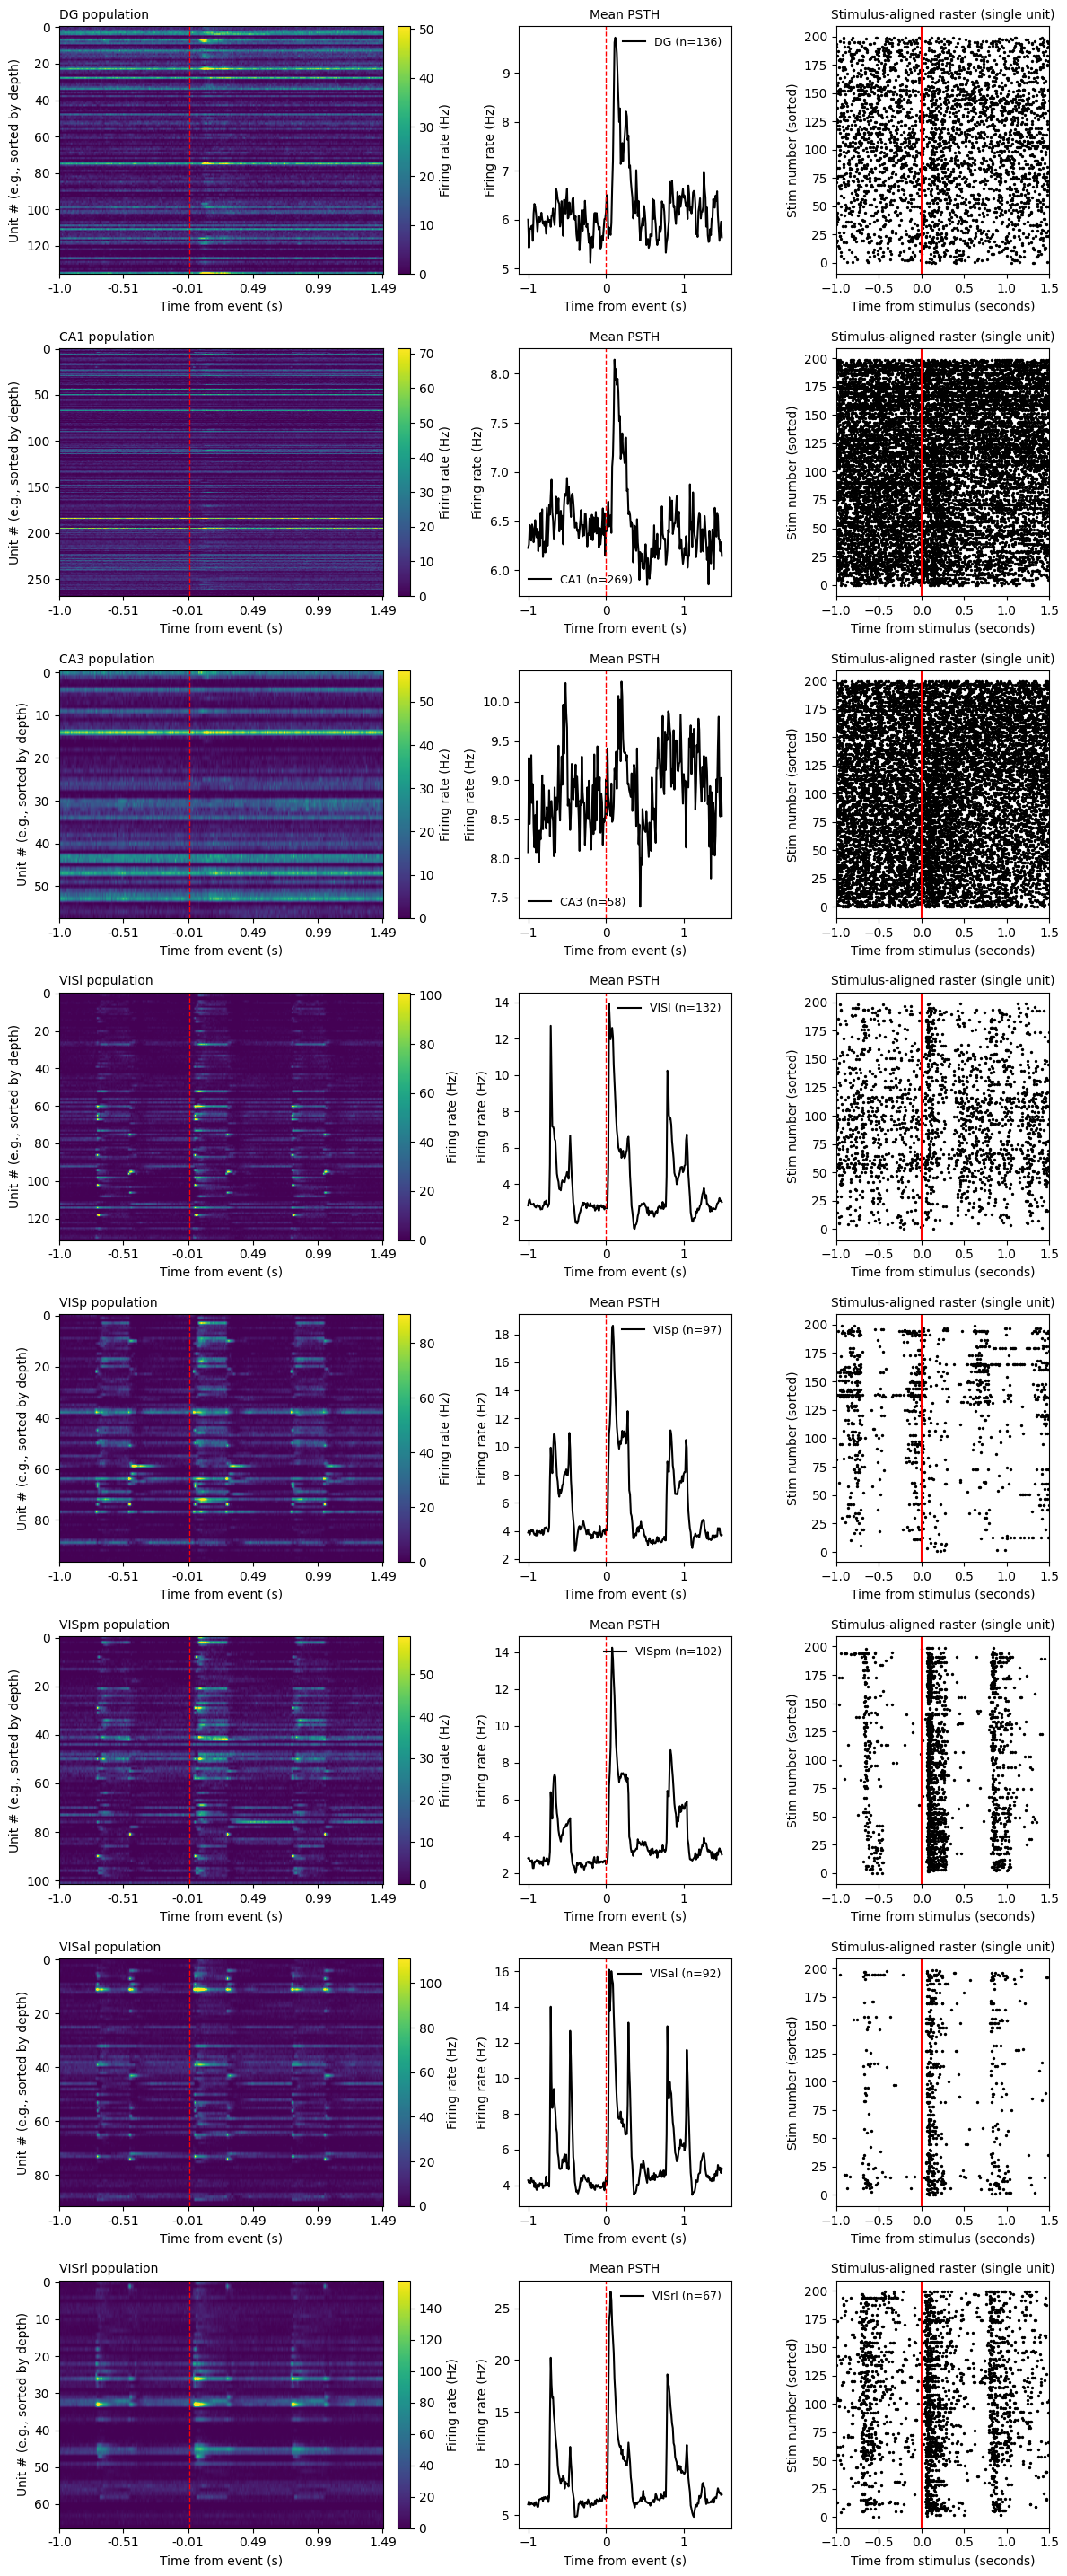

In [21]:
fig, axs, results = plot_multi_area_psth_and_raster(area_packets, change_times,
                                                    time_before_change=1.0, duration=2.5, hspace=0.3)
